In [1]:
# Basic Data Analysis Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('./datasets/data_1.csv')
df.head()

,subreddit,text
0,TwoSentenceHorror,"I was watching a movie with my 5 year old son,..."
1,TwoSentenceHorror,"“You know, I’ve never bungee jumped before– ma..."
2,TwoSentenceHorror,I gently put down my baby in his crib before I...
3,TwoSentenceHorror,My cat has a very annoying habit of shoving hi...
4,TwoSentenceHorror,I shuddered as I heard the screams coming from...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3606 entries, 0 to 3605
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   subreddit  3606 non-null   object
 1   text       3582 non-null   object
dtypes: object(2)
memory usage: 56.5+ KB


In [7]:
df.drop(df.loc[df.isnull().any(axis = 1)].index, inplace = True)

In [8]:
df.loc[:,'subreddit'].value_counts(normalize = True)

TwoSentenceHorror    0.660525
TwoSentenceComedy    0.339475
Name: subreddit, dtype: float64

Baseline accuracy (proportion of majority class) is 66%

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

cvec_horror = CountVectorizer(
    lowercase = True,
    stop_words = 'english',
    ngram_range = (2,3),
    max_df = 0.95,
    min_df = 5
)

horror = pd.DataFrame(cvec_horror.fit_transform(df.loc[df.loc[:,'subreddit'] == 'TwoSentenceHorror','text']).toarray(), columns = cvec_horror.get_feature_names())
horror

,bedroom window,best friend,came home,closet door,corner room,couldn help,covid 19,dad said,daughter asked,days ago,...,went missing,wish hadn,woke middle,woke middle night,woke morning,won let,won stop,year old,year old daughter,years ago
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2362,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2363,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2364,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
horror_word_count = {word: horror[word].sum() for word in cvec_horror.get_feature_names()}
horror_word_count

{'bedroom window': 5,
 'best friend': 11,
 'came home': 10,
 'closet door': 9,
 'corner room': 5,
 'couldn help': 7,
 'covid 19': 8,
 'dad said': 9,
 'daughter asked': 5,
 'days ago': 5,
 'dead bodies': 5,
 'dead body': 5,
 'did know': 13,
 'didn know': 17,
 'didn realize': 7,
 'didn really': 5,
 'died years': 7,
 'died years ago': 7,
 'don know': 31,
 'don think': 7,
 'don understand': 6,
 'don worry': 14,
 'door open': 5,
 'elementary school': 6,
 'fall asleep': 5,
 'feel like': 5,
 'fell asleep': 6,
 'felt like': 7,
 'finally got': 5,
 'getting closer': 5,
 'got home': 6,
 'heart stopped': 5,
 'hide seek': 9,
 'horror story': 6,
 'inside house': 6,
 'just like': 6,
 'just time': 6,
 'just wish': 14,
 'knock door': 8,
 'know ve': 5,
 'little brother': 7,
 'little did': 9,
 'little did know': 8,
 'little girl': 8,
 'living room': 7,
 'long day': 5,
 'long time': 8,
 'look face': 5,
 'look mirror': 5,
 'looked saw': 5,
 'make sure': 7,
 'man earth': 5,
 'middle night': 16,
 'monster be

In [47]:
horror.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom window,2366.0,0.002113,0.045931,0.0,0.0,0.0,0.0,1.0
best friend,2366.0,0.004649,0.068041,0.0,0.0,0.0,0.0,1.0
came home,2366.0,0.004227,0.064888,0.0,0.0,0.0,0.0,1.0
closet door,2366.0,0.003804,0.061571,0.0,0.0,0.0,0.0,1.0
corner room,2366.0,0.002113,0.045931,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
won let,2366.0,0.002113,0.045931,0.0,0.0,0.0,0.0,1.0
won stop,2366.0,0.002536,0.050305,0.0,0.0,0.0,0.0,1.0
year old,2366.0,0.007185,0.089343,0.0,0.0,0.0,0.0,2.0
year old daughter,2366.0,0.002113,0.045931,0.0,0.0,0.0,0.0,1.0


In [48]:
cvec_comedy = CountVectorizer(
    lowercase = True,
    stop_words = 'english',
    ngram_range = (2,3),
    max_df = 0.95,
    min_df = 5
)

comedy = pd.DataFrame(cvec_comedy.fit_transform(df.loc[df.loc[:,'subreddit'] == 'TwoSentenceComedy','text']).toarray(), columns = cvec_comedy.get_feature_names())
comedy

,best friend,don know,don like,don understand,feel like,having sex,just got,just like,looks like,sentence comedy,taco bell,toilet paper,ya know,year old
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1212,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1213,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1214,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [49]:
comedy_word_count = {word: comedy[word].sum() for word in cvec_comedy.get_feature_names()}
comedy_word_count

{'best friend': 5,
 'don know': 13,
 'don like': 5,
 'don understand': 5,
 'feel like': 7,
 'having sex': 5,
 'just got': 9,
 'just like': 6,
 'looks like': 5,
 'sentence comedy': 5,
 'taco bell': 5,
 'toilet paper': 6,
 'ya know': 5,
 'year old': 6}

In [50]:
comedy.describe().T

,count,mean,std,min,25%,50%,75%,max
best friend,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0
don know,1216.0,0.010691,0.102884,0.0,0.0,0.0,0.0,1.0
don like,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0
don understand,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0
feel like,1216.0,0.005757,0.075685,0.0,0.0,0.0,0.0,1.0
having sex,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0
just got,1216.0,0.007401,0.085747,0.0,0.0,0.0,0.0,1.0
just like,1216.0,0.004934,0.070099,0.0,0.0,0.0,0.0,1.0
looks like,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0
sentence comedy,1216.0,0.004112,0.064018,0.0,0.0,0.0,0.0,1.0


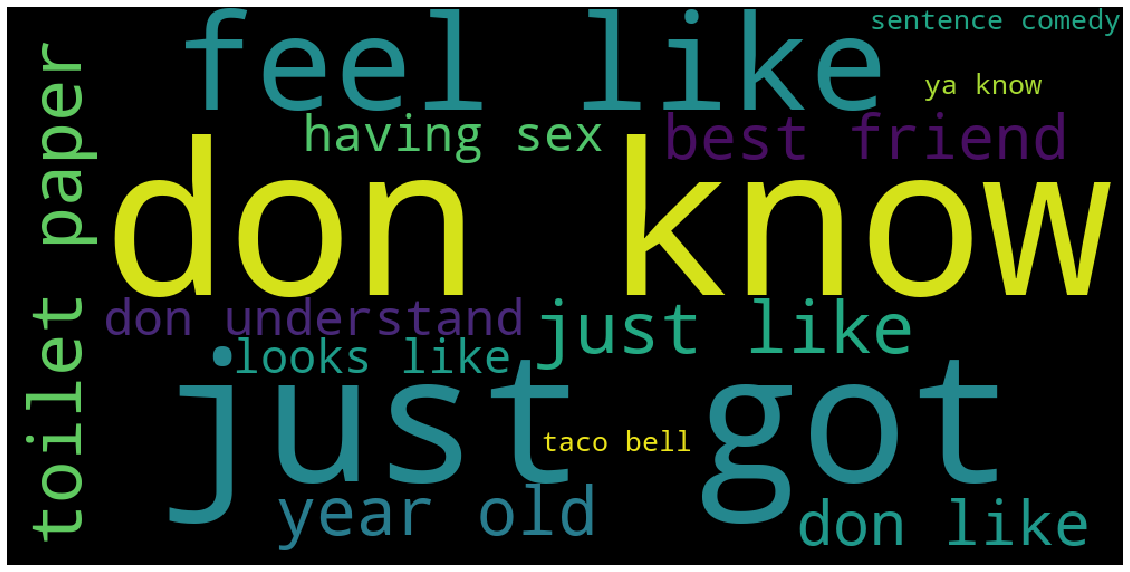

In [51]:
# Wordcloud from Comedy subreddit (Thanks to Ayshnoor)
from wordcloud import WordCloud

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(comedy_word_count)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

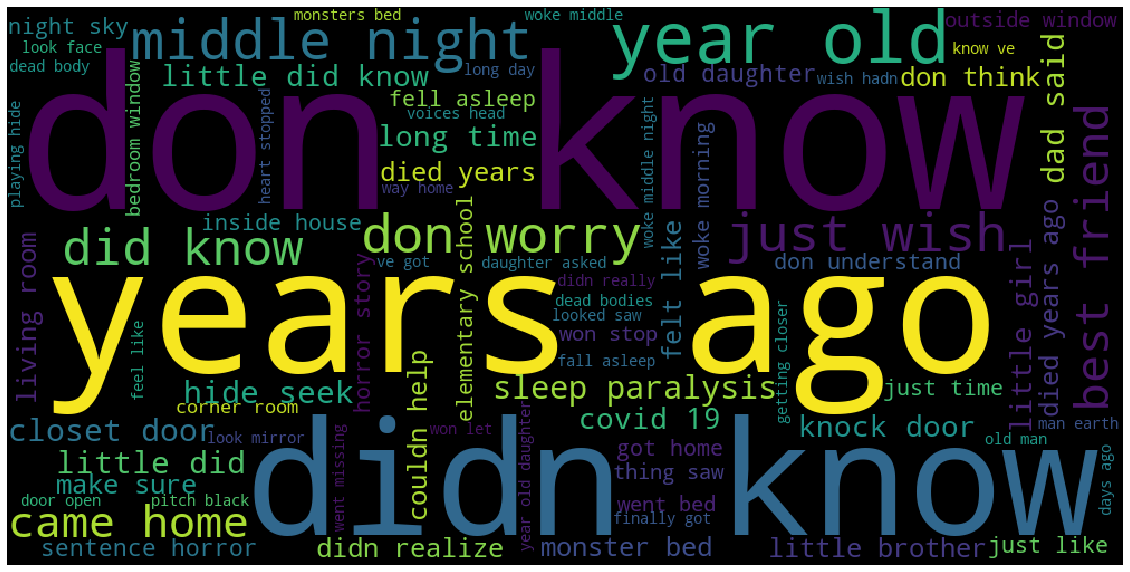

In [52]:
# Wordcloud from Horror subreddit
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(horror_word_count)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()